## 1. Fitting the Data

In data analysis fitting the data is essential as it gives us the idea how good our experimental data.

## 1.1. Fitting on a Gaussian Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Define the file path 
#file_path = "/home/hassan/Desktop/Jupyter_Book/My_JupyterBook/Python_Codes/Data_File/Gaussian_Data.dat"

# Opean and read the file
#with open(file_path, 'r') as file:
#    Gaussian_data = file.read()
#print(Gaussian_data)

In [3]:
# Loading the data 
#data100=np.loadtxt('./Gaussian_Data.dat',usecols=(0,1), skiprows=1)
#print(data100[0:, :])    # data100([skip row from:skip row to, skip column from:skip column to])

In [4]:
"""
from scipy import stats
from scipy.optimize import curve_fit

#N_points = 100
n_bins = 10000

x = np.loadtxt('./Gaussian_Data.dat',usecols=(0), skiprows=1)
y = np.loadtxt('./Gaussian_Data.dat',usecols=(1), skiprows=1)
legend = ['distribution']

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Creating histogram
fig, axs = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)

# Histogram for x values
N, bins, patches = axs.hist(x, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')

# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Initial guess for Gaussian parameters
initial_guess = [1, np.mean(x), np.std(x)]

# Fit the Gaussian function to the histogram data
popt, _ = curve_fit(gaussian, bin_centers, N, p0=initial_guess)

# Extract fitting parameters
A_fit, mu_fit, sigma_fit = popt

# Create a smooth x range for plotting the Gaussian fit
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)

# Plot Gaussian fit
axs.plot(x_fit, y_fit, 'r-', label=f'Gaussian Fit: $\mu={mu_fit:.2f}, \sigma={sigma_fit:.2f}$')

# Styling the plot
axs.set_xlabel("X-axis")
axs.set_ylabel("Density")
axs.set_title("Histogram with Gaussian Fit")
axs.legend()
axs.grid(visible=True, linestyle='--', alpha=0.7)

# Show plot
plt.show()
"""

'\nfrom scipy import stats\nfrom scipy.optimize import curve_fit\n\n#N_points = 100\nn_bins = 10000\n\nx = np.loadtxt(\'./Gaussian_Data.dat\',usecols=(0), skiprows=1)\ny = np.loadtxt(\'./Gaussian_Data.dat\',usecols=(1), skiprows=1)\nlegend = [\'distribution\']\n\n# Define Gaussian function\ndef gaussian(x, A, mu, sigma):\n    return A * np.exp(-((x - mu)**2) / (2 * sigma**2))\n\n# Creating histogram\nfig, axs = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)\n\n# Histogram for x values\nN, bins, patches = axs.hist(x, bins=30, density=True, alpha=0.6, color=\'g\', label=\'Data Histogram\')\n\n# Calculate bin centers\nbin_centers = (bins[:-1] + bins[1:]) / 2\n\n# Initial guess for Gaussian parameters\ninitial_guess = [1, np.mean(x), np.std(x)]\n\n# Fit the Gaussian function to the histogram data\npopt, _ = curve_fit(gaussian, bin_centers, N, p0=initial_guess)\n\n# Extract fitting parameters\nA_fit, mu_fit, sigma_fit = popt\n\n# Create a smooth x range for plotting the Gaussian fit

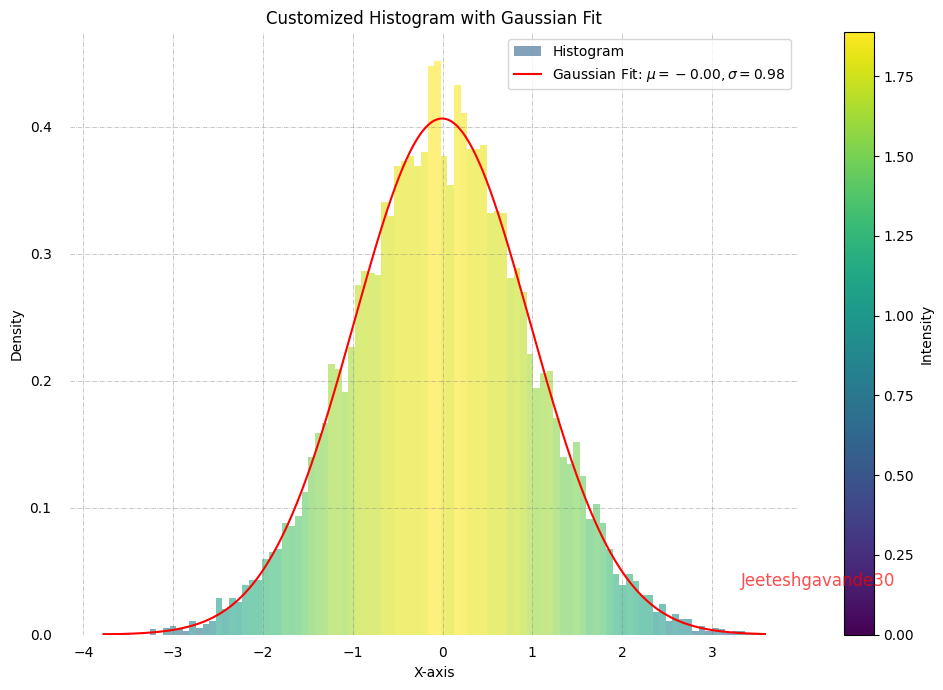

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import colors
from scipy import stats


# Function to define a Gaussian
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu)**2) / (2 * sigma**2))

# Load data
x = np.loadtxt('./Data_File/Gaussian_Data.dat', usecols=(0), skiprows=1)
y = np.loadtxt('./Data_File/Gaussian_Data.dat', usecols=(1), skiprows=1)
n_bins = 100
legend = ['Distribution']

# Creating histogram
fig, axs = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add padding between axes and labels
axs.xaxis.set_tick_params(pad=5)
axs.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
axs.grid(visible=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.6)

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize=12, color='red', ha='right', va='bottom', alpha=0.7)

# Create histogram
N, bins, patches = axs.hist(x, bins=n_bins, density=True, alpha=0.6, label='Histogram')

# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Initial guess for Gaussian parameters
initial_guess = [1, np.mean(x), np.std(x)]

# Fit the Gaussian function to the histogram data
popt, _ = curve_fit(gaussian, bin_centers, N, p0=initial_guess)

# Extract fitted parameters
A_fit, mu_fit, sigma_fit = popt

# Create a smooth x range for plotting the Gaussian fit
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)

# Plot Gaussian fit
axs.plot(x_fit, y_fit, 'r-', label=f'Gaussian Fit: $\mu={mu_fit:.2f}, \sigma={sigma_fit:.2f}$')

# Set color for histogram bars
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# Adding a color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs)
cbar.set_label('Intensity')

# Add extra features
plt.xlabel("X-axis")
plt.ylabel("Density")
plt.legend()
plt.title('Customized Histogram with Gaussian Fit')

# Show plot
plt.show()


In the Gaussian (or normal) distribution, **mu ($\mu$)** and sigma **($\sigma$)** are the two parameters that define the distribution. 

**mu($\mu$)-Mean:** The mean ($\mu$) represents the center or the average of the distribution. It is the average value of the data points in the <code style= "color:black">x</code> dataset. A Gaussian distribution is symmetric around its mean, so $\mu$=0.00 implies that your data is centered around zero, such as in the above example.

**Sigma ($\sigma$)-Standard Deviation:** The standard deviation ($\sigma$)represents the spread or width of the distribution.
* A smaller ($\sigma$) indicates that the data points are closely clustered around the mean.
* A larger ($\sigma$) indicates that the data points are more spread out.
* In our case, ($\sigma$)=0.98 means the data points are distributed with a moderate spread around the mean.

**Key Insights:** For a perfect Gaussian distribution, approximately:
* 68% of the data lies within $\mu$ $\pm$ $\sigma$ (one standard deviation).
* 95% of the data lies within $\mu$ $\pm$ 2$\sigma$ (two standard deviation).
* 99.7% of the data lies within $\mu$ $\pm$ 3$\sigma$ (three standard deviation).

In our case, the red curve represnts Gaussian fit to th data. The calculated $\mu$=0.00 and $\sigma$=0.98, Indicate that your data is centered at zero with a spread of about 0.98 units.

## 1.2. Gaussian Fitting (Maunally Selecting the Centroid and the Range)
Some time we have multiple Gaussian peak and for that we have to provide a range and a rough certroid and try to fit the experimental data. Also we are some times interested in a specific peak and therefore we can just manually give the code the range and a rough centroid and it will provide us the Gaussian fit on that specific peak. 

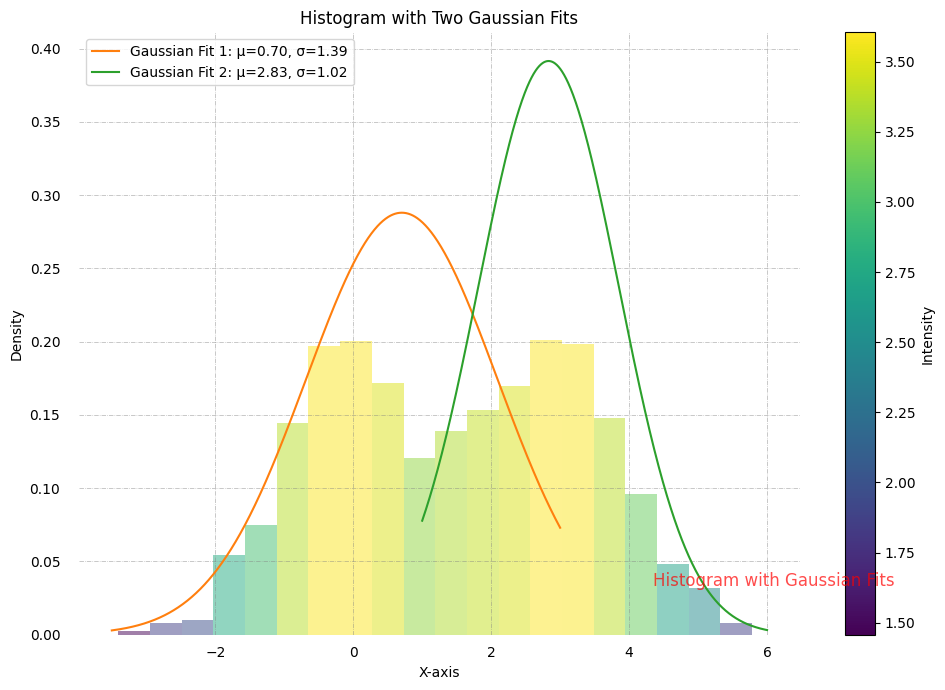

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import colors

# Load data
x = np.loadtxt('./Two_Gaussian_Data.dat', usecols=(0), skiprows=1)
y = np.loadtxt('./Two_Gaussian_Data.dat', usecols=(1), skiprows=1)

# Define manual ranges and their corresponding centroids
range1 = (-3.5, 3)  # First range
centroid1 = 0.8    # First centroid

range2 = (1, 6)  # Second range
centroid2 = 3     # Second centroid

# Creating histogram
fig, axs = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add padding between axes and labels
axs.xaxis.set_tick_params(pad=5)
axs.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
axs.grid(visible=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.6)

# Add Text watermark
fig.text(0.9, 0.15, 'Histogram with Gaussian Fits', fontsize=12, color='red', ha='right', va='bottom', alpha=0.7)

# Combine `x` and `y` into a single array for the histogram
data_combined = np.concatenate([x, y])

# Plot the histogram
N, bins, patches = axs.hist(data_combined, bins=20, density=True, alpha=0.5)

# Set color for the histogram
fracs = ((N**(1 / 5)) / N.max())
color_norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(color_norm(thisfrac))
    thispatch.set_facecolor(color)

# Function to fit and plot a Gaussian for a specific range
def plot_gaussian_fit(data, range_min, range_max, label):
    # Filter data within the specified range
    data_in_range = data[(data >= range_min) & (data <= range_max)]
    
    # Fit a Gaussian to the filtered data
    mu, std = norm.fit(data_in_range)
    
    # Create x values for the Gaussian curve
    x_fit = np.linspace(range_min, range_max, 1000)
    y_fit = norm.pdf(x_fit, mu, std)
    
    # Plot the Gaussian curve
    axs.plot(x_fit, y_fit, label=f"{label}: μ={mu:.2f}, σ={std:.2f}")

# Plot Gaussian fits for the specified ranges
plot_gaussian_fit(data_combined, *range1, "Gaussian Fit 1")  # First Gaussian
plot_gaussian_fit(data_combined, *range2, "Gaussian Fit 2")  # Second Gaussian

# Adding a color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=color_norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs)
cbar.set_label('Intensity')

# Adding extra features
plt.xlabel("X-axis")
plt.ylabel("Density")
plt.legend()
plt.title('Histogram with Two Gaussian Fits')

# Show plot
plt.show()


## Multipeak Fitting
In Nuclear physics, the experimental data have several peaks at specific energy. For some of the peaks the statistics (counts/events) are very high and  for the others is has low statistics (counts/events). Generally, most of the times we are more interested in the peaks that has high statistics as it represents the actuall reael events in the experiment while low statistics peaks are usually consisderd as a noise in the background and basically those small peaks don't provide any significant informantion about the detection of gammas or neutrons (depending on the experiments).

Therefore, we need a multiple peak fitting that perfectly fit the peaks of our interests. In **CERN ROOT** it only require a few lines of code and it select multi-peaks for fitting but some times a few peaks are missed in the fitting, which is resolved by maunally or forcing the program to select the specific peaks.

Here we have developed a code that can me use for mult-peak fitting. 

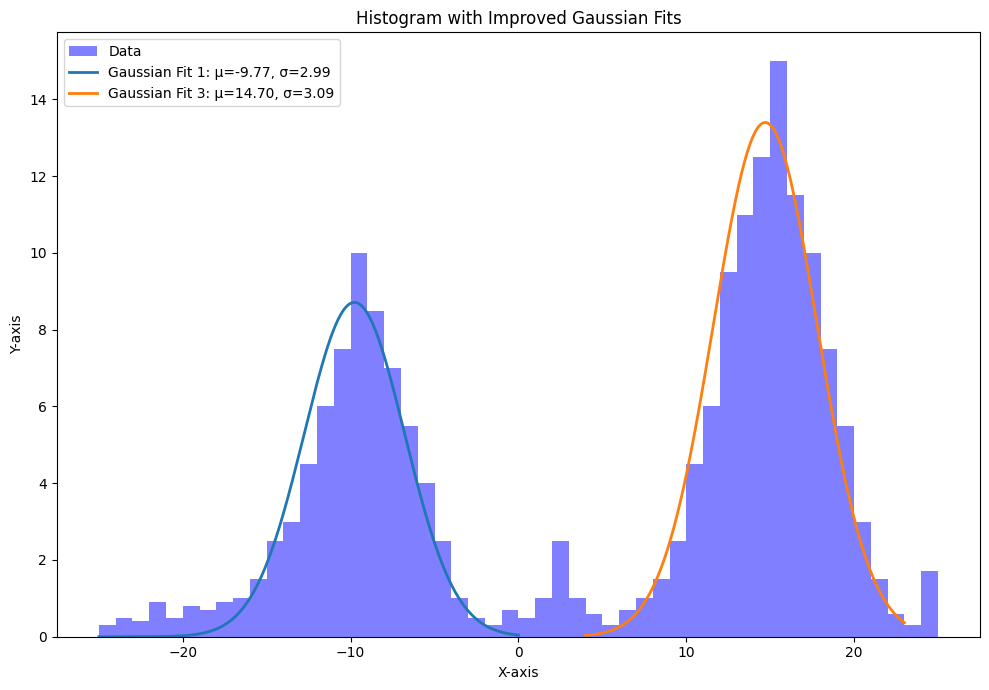

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

# Provided data
data = np.array([
    [-25, 0.3], [-24, 0.5], [-23, 0.4], [-22, 0.9], [-21, 0.5], [-20, 0.8],
    [-19, 0.7], [-18, 0.9], [-17, 1.0], [-16, 1.5], [-15, 2.5], [-14, 3.0],
    [-13, 4.5], [-12, 6.0], [-11, 7.5], [-10, 10.0], [-9, 8.5], [-8, 7.0],
    [-7, 5.5], [-6, 4.0], [-5, 2.5], [-4, 1.0], [-3, 0.5], [-2, 0.3],
    [-1, 0.7], [0, 0.5], [1, 1.0], [2, 2.5], [3, 1.0], [4, 0.6], [5, 0.3],
    [6, 0.7], [7, 1.0], [8, 1.5], [9, 2.5], [10, 4.5], [11, 6.0], [12, 9.5],
    [13, 11.0], [14, 12.5], [15, 15.0], [16, 11.5], [17, 10.0], [18, 7.5],
    [19, 5.5], [20, 3.0], [21, 1.5], [22, 0.6], [23, 0.3], [24, 0.9],
    [25, 0.8]
])

x, y = data[:, 0], data[:, 1]

# Define manual ranges
# Define manual ranges and their corresponding centroids
range1 = (-25, 0)  # First range
centroid1 = 10      # First centroid

#range2 = (-9, 0)     # Second range
#centroid2 = -4       # Second centroid

range3 = (4, 23)     # Third range
centroid3 = 15       # Third centroid

#range4 = (16, 25)    # Fourth range
#centroid4 = 20       # Fourth centroid


# Define a Gaussian function
def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Function to fit and plot a Gaussian for a specific range
def plot_gaussian_fit(x_data, y_data, range_min, range_max, label, ax):
    # Filter data within the specified range
    mask = (x_data >= range_min) & (x_data <= range_max)
    x_filtered, y_filtered = x_data[mask], y_data[mask]
    
    # Fit Gaussian using curve_fit
    try:
        popt, _ = curve_fit(gaussian, x_filtered, y_filtered, p0=[y_filtered.max(), np.mean(x_filtered), np.std(x_filtered)])
        amp, mu, sigma = popt
        
        # Create x values for the Gaussian curve
        x_fit = np.linspace(range_min, range_max, 1000)
        y_fit = gaussian(x_fit, amp, mu, sigma)
        
        # Plot the Gaussian curve
        ax.plot(x_fit, y_fit, label=f"{label}: μ={mu:.2f}, σ={sigma:.2f}", linewidth=2)
    except RuntimeError:
        print(f"Fit failed for {label} in range {range_min} to {range_max}")

# Creating histogram
fig, axs = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)

# Plot the histogram with custom bins
axs.hist(x, bins=50, weights=y, alpha=0.5, color='blue', label='Data')

# Plot Gaussian fits for each range
plot_gaussian_fit(x, y, *range1, "Gaussian Fit 1", axs)
plot_gaussian_fit(x, y, *range3, "Gaussian Fit 3", axs)

# Adding extra features
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title('Histogram with Improved Gaussian Fits')

# Show plot
plt.show()


In [52]:
ls

Gaussian_Data.dat  multi_peak.dat  Two_Gaussian_Data.dat


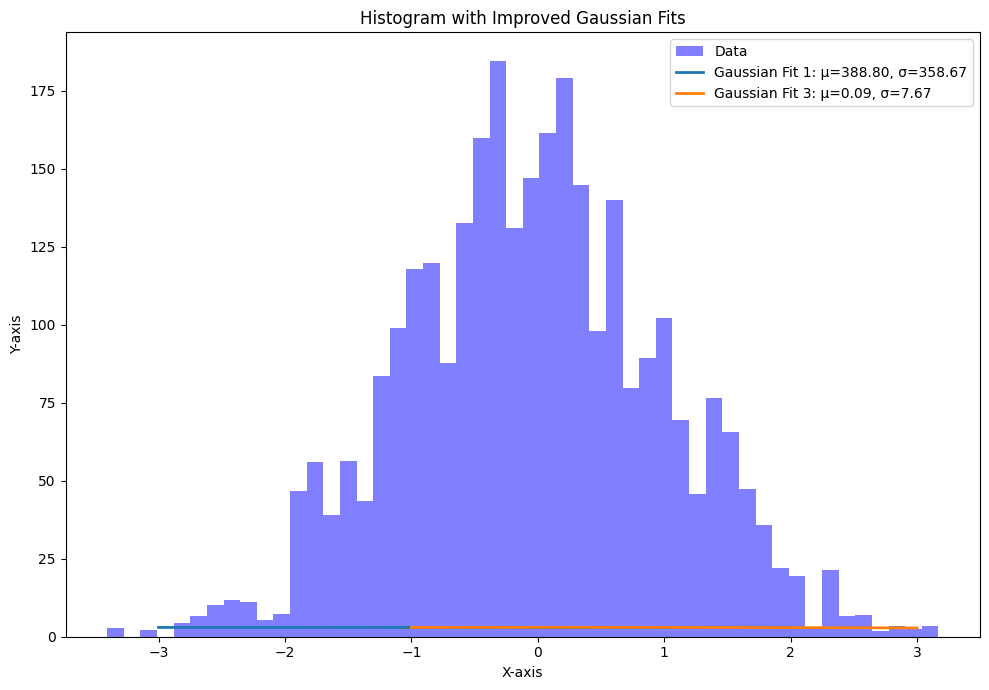

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit

# Load data
x = np.loadtxt('./Two_Gaussian_Data.dat', usecols=(0), skiprows=1)
y = np.loadtxt('./Two_Gaussian_Data.dat', usecols=(1), skiprows=1)


# Define manual ranges
# Define manual ranges and their corresponding centroids
range1 = (-3, 2)  # First range
centroid1 = -1.8      # First centroid

#range2 = (-9, 0)     # Second range
#centroid2 = -4       # Second centroid

range3 = (-1, 3)     # Third range
centroid3 = 0.2       # Third centroid

#range4 = (16, 25)    # Fourth range
#centroid4 = 20       # Fourth centroid


# Define a Gaussian function
def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Function to fit and plot a Gaussian for a specific range
def plot_gaussian_fit(x_data, y_data, range_min, range_max, label, ax):
    # Filter data within the specified range
    mask = (x_data >= range_min) & (x_data <= range_max)
    x_filtered, y_filtered = x_data[mask], y_data[mask]
    
    # Fit Gaussian using curve_fit
    try:
        popt, _ = curve_fit(gaussian, x_filtered, y_filtered, p0=[y_filtered.max(), np.mean(x_filtered), np.std(x_filtered)])
        amp, mu, sigma = popt
        
        # Create x values for the Gaussian curve
        x_fit = np.linspace(range_min, range_max, 1000)
        y_fit = gaussian(x_fit, amp, mu, sigma)
        
        # Plot the Gaussian curve
        ax.plot(x_fit, y_fit, label=f"{label}: μ={mu:.2f}, σ={sigma:.2f}", linewidth=2)
    except RuntimeError:
        print(f"Fit failed for {label} in range {range_min} to {range_max}")

# Creating histogram
fig, axs = plt.subplots(1, 1, figsize=(10, 7), tight_layout=True)

# Plot the histogram with custom bins
axs.hist(x, bins=50, weights=y, alpha=0.5, color='blue', label='Data')

# Plot Gaussian fits for each range
plot_gaussian_fit(x, y, *range1, "Gaussian Fit 1", axs)
plot_gaussian_fit(x, y, *range3, "Gaussian Fit 3", axs)

# Adding extra features
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.title('Histogram with Improved Gaussian Fits')

# Show plot
plt.show()





## 1.3. Polynomial Fitting
Here I have used the data files from my master thesis work of **Energy** <code style= "color:red">Energies.txt</code> and Efficiency <code style= "color:red">Effic_log.txt</code>. In the polynomial fit, we can do all fit, for instance, **linear fit**, **quadratic fit** and so we only have to change the value in the following code line 
<code style= "color:red"># Define the degree of the polynomial fit
degree = 1</code>

**<code style= "color:red">degree = 1</code>** will gives the **linear fit**, and **<code style= "color:red">degree = 2</code>** will give us the **quadratic fit**. We can go as high as long as the fitting is good enough. Below you will see the output for the polynomial up to <code style= "color:red">degree=10</code>. The polynomial that fits with the data is <code style= "color:red">degree=8</code>.

Fitted Parameters:
Polynomial Coefficients: -0.500996 0.914520


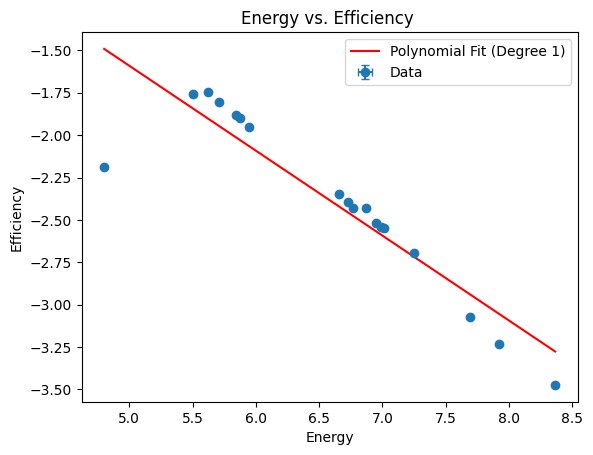

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data4 = np.genfromtxt('Effic_log.txt', skip_header=1)

# Extract the columns from the data
energies = data4[:, 0]
efficiencies = data4[:, 1]
error_in_x = np.zeros_like(energies)
error_in_y = data4[:, 2]

# Define the degree of the polynomial fit
degree = 1

# Perform polynomial fit
fit_params = np.polyfit(energies, efficiencies, deg=degree)

# Generate fitted curve
x_fit = np.linspace(min(energies), max(energies), 100)
y_fit = np.polyval(fit_params, x_fit)

# Plot the data points with error bars
plt.errorbar(energies, efficiencies, xerr=error_in_x, yerr=error_in_y, fmt='o', capsize=3, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit (Degree {})'.format(degree))

# Set plot title and labels
plt.title('Energy vs. Efficiency ')
plt.xlabel('Energy')
plt.ylabel('Efficiency')

# Add legend
plt.legend()

# Display the plot
#plt.show()
#plt.savefig('Eu_Ba_Ga_fitted_to_the_polynomial_degree_8')

# Print the fitted parameters
params_str = ' '.join(['{:.6f}'.format(param) for param in fit_params])
print("Fitted Parameters:")
print("Polynomial Coefficients:", params_str)


Fitted Parameters:
Polynomial Coefficients: 0.107242 -2.293806 15.553906 -35.823333


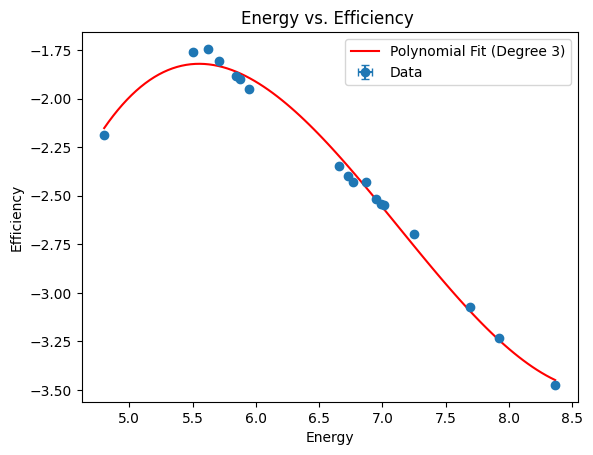

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data4 = np.genfromtxt('Effic_log.txt', skip_header=1)

# Extract the columns from the data
energies = data4[:, 0]
efficiencies = data4[:, 1]
error_in_x = np.zeros_like(energies)
error_in_y = data4[:, 2]

# Define the degree of the polynomial fit
degree = 3

# Perform polynomial fit
fit_params = np.polyfit(energies, efficiencies, deg=degree)

# Generate fitted curve
x_fit = np.linspace(min(energies), max(energies), 100)
y_fit = np.polyval(fit_params, x_fit)

# Plot the data points with error bars
plt.errorbar(energies, efficiencies, xerr=error_in_x, yerr=error_in_y, fmt='o', capsize=3, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit (Degree {})'.format(degree))

# Set plot title and labels
plt.title('Energy vs. Efficiency ')
plt.xlabel('Energy')
plt.ylabel('Efficiency')

# Add legend
plt.legend()

# Display the plot
#plt.show()
#plt.savefig('Eu_Ba_Ga_fitted_to_the_polynomial_degree_8')

# Print the fitted parameters
params_str = ' '.join(['{:.6f}'.format(param) for param in fit_params])
print("Fitted Parameters:")
print("Polynomial Coefficients:", params_str)


Fitted Parameters:
Polynomial Coefficients: -0.030797 0.911097 -10.065639 48.529837 -87.622115


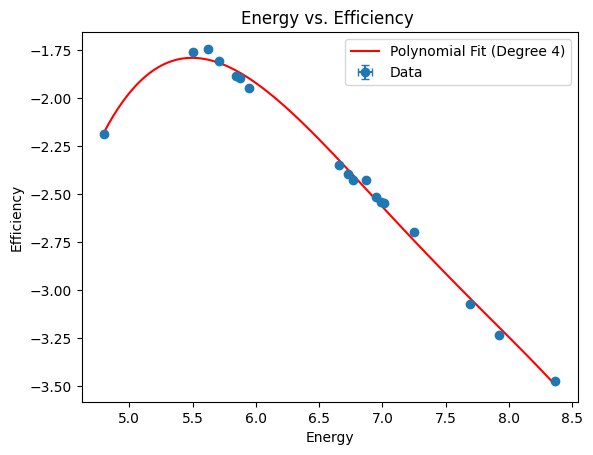

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data4 = np.genfromtxt('Effic_log.txt', skip_header=1)

# Extract the columns from the data
energies = data4[:, 0]
efficiencies = data4[:, 1]
error_in_x = np.zeros_like(energies)
error_in_y = data4[:, 2]

# Define the degree of the polynomial fit
degree = 4

# Perform polynomial fit
fit_params = np.polyfit(energies, efficiencies, deg=degree)

# Generate fitted curve
x_fit = np.linspace(min(energies), max(energies), 100)
y_fit = np.polyval(fit_params, x_fit)

# Plot the data points with error bars
plt.errorbar(energies, efficiencies, xerr=error_in_x, yerr=error_in_y, fmt='o', capsize=3, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit (Degree {})'.format(degree))

# Set plot title and labels
plt.title('Energy vs. Efficiency ')
plt.xlabel('Energy')
plt.ylabel('Efficiency')

# Add legend
plt.legend()

# Display the plot
#plt.show()
#plt.savefig('Eu_Ba_Ga_fitted_to_the_polynomial_degree_8')

# Print the fitted parameters
params_str = ' '.join(['{:.6f}'.format(param) for param in fit_params])
print("Fitted Parameters:")
print("Polynomial Coefficients:", params_str)


Fitted Parameters:
Polynomial Coefficients: 0.051120 -1.732838 23.374857 -156.906717 523.734415 -696.453145


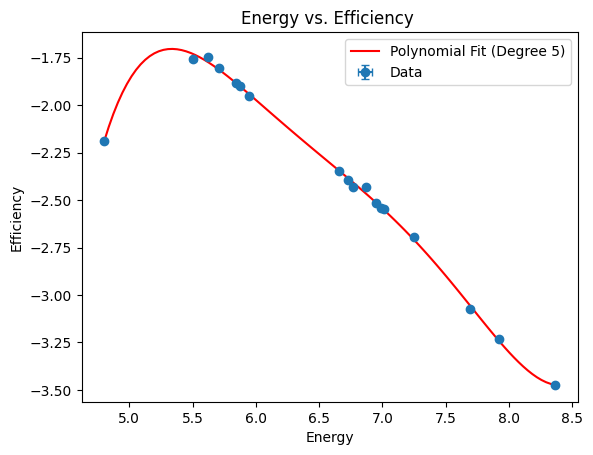

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data4 = np.genfromtxt('Effic_log.txt', skip_header=1)

# Extract the columns from the data
energies = data4[:, 0]
efficiencies = data4[:, 1]
error_in_x = np.zeros_like(energies)
error_in_y = data4[:, 2]

# Define the degree of the polynomial fit
degree = 5

# Perform polynomial fit
fit_params = np.polyfit(energies, efficiencies, deg=degree)

# Generate fitted curve
x_fit = np.linspace(min(energies), max(energies), 100)
y_fit = np.polyval(fit_params, x_fit)

# Plot the data points with error bars
plt.errorbar(energies, efficiencies, xerr=error_in_x, yerr=error_in_y, fmt='o', capsize=3, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit (Degree {})'.format(degree))

# Set plot title and labels
plt.title('Energy vs. Efficiency ')
plt.xlabel('Energy')
plt.ylabel('Efficiency')

# Add legend
plt.legend()

# Display the plot
#plt.show()
#plt.savefig('Eu_Ba_Ga_fitted_to_the_polynomial_degree_8')

# Print the fitted parameters
params_str = ' '.join(['{:.6f}'.format(param) for param in fit_params])
print("Fitted Parameters:")
print("Polynomial Coefficients:", params_str)


Fitted Parameters:
Polynomial Coefficients: 0.021503 -1.196788 28.978484 -398.620398 3406.319184 -18511.954315 62468.245973 -119643.105205 99551.272955


6

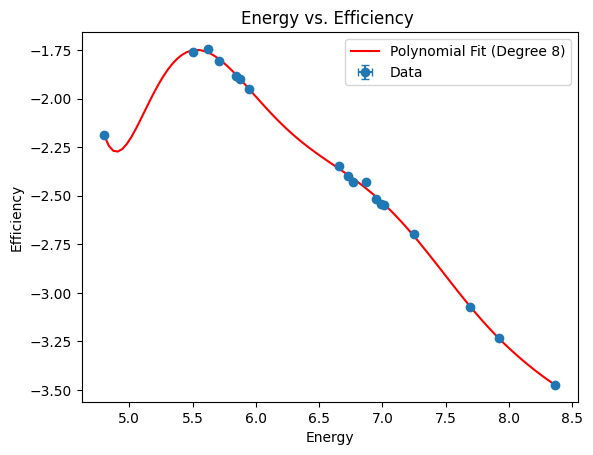

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data4 = np.genfromtxt('Effic_log.txt', skip_header=1)

# Extract the columns from the data
energies = data4[:, 0]
efficiencies = data4[:, 1]
error_in_x = np.zeros_like(energies)
error_in_y = data4[:, 2]

# Define the degree of the polynomial fit
degree = 8

# Perform polynomial fit
fit_params = np.polyfit(energies, efficiencies, deg=degree)

# Generate fitted curve
x_fit = np.linspace(min(energies), max(energies), 100)
y_fit = np.polyval(fit_params, x_fit)

# Plot the data points with error bars
plt.errorbar(energies, efficiencies, xerr=error_in_x, yerr=error_in_y, fmt='o', capsize=3, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit (Degree {})'.format(degree))

# Set plot title and labels
plt.title('Energy vs. Efficiency ')
plt.xlabel('Energy')
plt.ylabel('Efficiency')

# Add legend
plt.legend()

# Display the plot
#plt.show()
#plt.savefig('Eu_Ba_Ga_fitted_to_the_polynomial_degree_8')

# Print the fitted parameters
params_str = ' '.join(['{:.6f}'.format(param) for param in fit_params])
print("Fitted Parameters:")
print("Polynomial Coefficients:", params_str)
6

Fitted Parameters:
Polynomial Coefficients: -0.045948 2.145406 -42.650371 467.851210 -3057.593952 11902.016419 -25543.644009 23308.097081


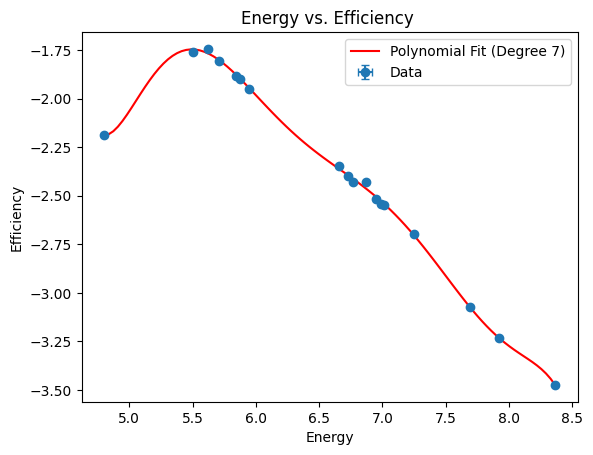

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data4 = np.genfromtxt('Effic_log.txt', skip_header=1)

# Extract the columns from the data
energies = data4[:, 0]
efficiencies = data4[:, 1]
error_in_x = np.zeros_like(energies)
error_in_y = data4[:, 2]

# Define the degree of the polynomial fit
degree = 7

# Perform polynomial fit
fit_params = np.polyfit(energies, efficiencies, deg=degree)

# Generate fitted curve
x_fit = np.linspace(min(energies), max(energies), 100)
y_fit = np.polyval(fit_params, x_fit)

# Plot the data points with error bars
plt.errorbar(energies, efficiencies, xerr=error_in_x, yerr=error_in_y, fmt='o', capsize=3, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit (Degree {})'.format(degree))

# Set plot title and labels
plt.title('Energy vs. Efficiency ')
plt.xlabel('Energy')
plt.ylabel('Efficiency')

# Add legend
plt.legend()

# Display the plot
#plt.show()
#plt.savefig('Eu_Ba_Ga_fitted_to_the_polynomial_degree_8')

# Print the fitted parameters
params_str = ' '.join(['{:.6f}'.format(param) for param in fit_params])
print("Fitted Parameters:")
print("Polynomial Coefficients:", params_str)


Fitted Parameters:
Polynomial Coefficients: 0.021503 -1.196788 28.978484 -398.620398 3406.319184 -18511.954315 62468.245973 -119643.105205 99551.272955


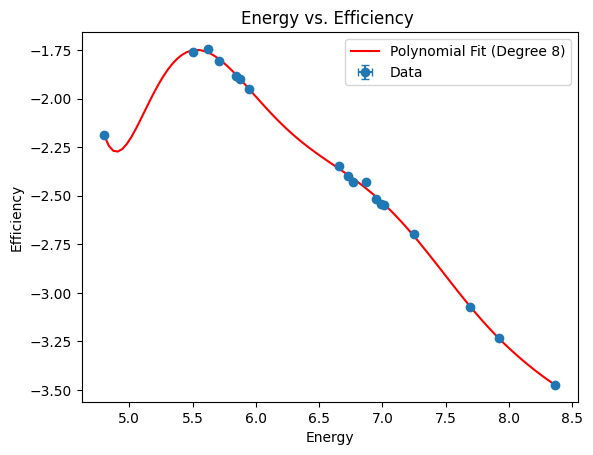

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data4 = np.genfromtxt('Effic_log.txt', skip_header=1)

# Extract the columns from the data
energies = data4[:, 0]
efficiencies = data4[:, 1]
error_in_x = np.zeros_like(energies)
error_in_y = data4[:, 2]

# Define the degree of the polynomial fit
degree = 8

# Perform polynomial fit
fit_params = np.polyfit(energies, efficiencies, deg=degree)

# Generate fitted curve
x_fit = np.linspace(min(energies), max(energies), 100)
y_fit = np.polyval(fit_params, x_fit)

# Plot the data points with error bars
plt.errorbar(energies, efficiencies, xerr=error_in_x, yerr=error_in_y, fmt='o', capsize=3, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit (Degree {})'.format(degree))

# Set plot title and labels
plt.title('Energy vs. Efficiency ')
plt.xlabel('Energy')
plt.ylabel('Efficiency')

# Add legend
plt.legend()

# Display the plot
#plt.show()
#plt.savefig('Eu_Ba_Ga_fitted_to_the_polynomial_degree_8')

# Print the fitted parameters
params_str = ' '.join(['{:.6f}'.format(param) for param in fit_params])
print("Fitted Parameters:")
print("Polynomial Coefficients:", params_str)


Fitted Parameters:
Polynomial Coefficients: -0.060356 3.633436 -96.912578 1503.100056 -14938.664768 98654.040767 -432873.524799 1216786.712305 -1988064.147761 1438322.164674


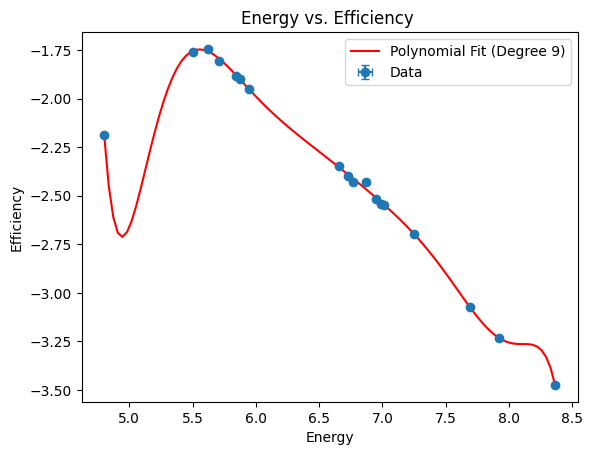

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data4 = np.genfromtxt('Effic_log.txt', skip_header=1)

# Extract the columns from the data
energies = data4[:, 0]
efficiencies = data4[:, 1]
error_in_x = np.zeros_like(energies)
error_in_y = data4[:, 2]

# Define the degree of the polynomial fit
degree = 9

# Perform polynomial fit
fit_params = np.polyfit(energies, efficiencies, deg=degree)

# Generate fitted curve
x_fit = np.linspace(min(energies), max(energies), 100)
y_fit = np.polyval(fit_params, x_fit)

# Plot the data points with error bars
plt.errorbar(energies, efficiencies, xerr=error_in_x, yerr=error_in_y, fmt='o', capsize=3, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit (Degree {})'.format(degree))

# Set plot title and labels
plt.title('Energy vs. Efficiency ')
plt.xlabel('Energy')
plt.ylabel('Efficiency')

# Add legend
plt.legend()

# Display the plot
#plt.show()
#plt.savefig('Eu_Ba_Ga_fitted_to_the_polynomial_degree_8')

# Print the fitted parameters
params_str = ' '.join(['{:.6f}'.format(param) for param in fit_params])
print("Fitted Parameters:")
print("Polynomial Coefficients:", params_str)


Fitted Parameters:
Polynomial Coefficients: 0.109645 -7.371886 222.364334 -3962.553609 46195.876021 -368132.497562 2030732.035578 -7656560.184260 18882164.785038 -27502400.211611 17964762.337120


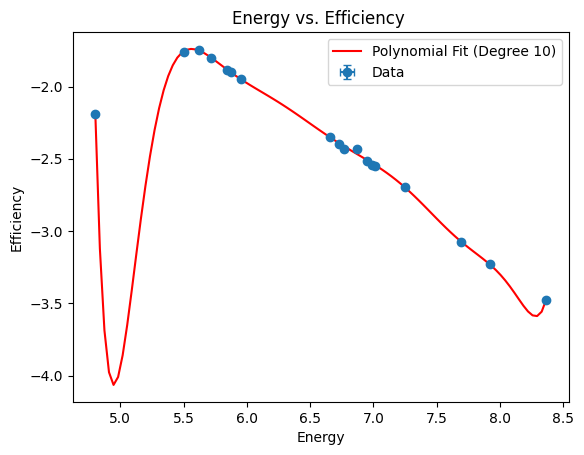

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the file
data4 = np.genfromtxt('Effic_log.txt', skip_header=1)

# Extract the columns from the data
energies = data4[:, 0]
efficiencies = data4[:, 1]
error_in_x = np.zeros_like(energies)
error_in_y = data4[:, 2]

# Define the degree of the polynomial fit
degree = 10

# Perform polynomial fit
fit_params = np.polyfit(energies, efficiencies, deg=degree)

# Generate fitted curve
x_fit = np.linspace(min(energies), max(energies), 100)
y_fit = np.polyval(fit_params, x_fit)

# Plot the data points with error bars
plt.errorbar(energies, efficiencies, xerr=error_in_x, yerr=error_in_y, fmt='o', capsize=3, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Polynomial Fit (Degree {})'.format(degree))

# Set plot title and labels
plt.title('Energy vs. Efficiency ')
plt.xlabel('Energy')
plt.ylabel('Efficiency')

# Add legend
plt.legend()

# Display the plot
#plt.show()
#plt.savefig('Eu_Ba_Ga_fitted_to_the_polynomial_degree_8')

# Print the fitted parameters
params_str = ' '.join(['{:.6f}'.format(param) for param in fit_params])
print("Fitted Parameters:")
print("Polynomial Coefficients:", params_str)
